In [31]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import pandas as pd
import numpy as np

Rectangle(xy=(68, 171), width=201, height=158, angle=0)
Rectangle(xy=(149, 140), width=79, height=143, angle=0)
Rectangle(xy=(284, 200), width=42, height=130, angle=0)
Rectangle(xy=(257, 197), width=39, height=131, angle=0)


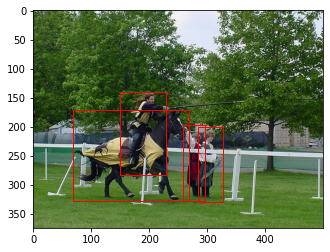

In [50]:
DATASET_PATH = "./PASCAL_VOC/"
IMAGES_PATH = DATASET_PATH + "images/"
LABELS_PATH = DATASET_PATH + "labels/"

annotations = pd.read_csv(DATASET_PATH + "1examples.csv")
image = Image.open(IMAGES_PATH + annotations.head(1)["img"].loc[0])
fig, ax = plt.subplots()
ax.imshow(image)

bboxes = np.loadtxt(fname=LABELS_PATH + annotations.head(1)["label"].loc[0])

for bbox in bboxes:
    rect = patches.Rectangle((bbox[1]*500 - bbox[3]*500/2, bbox[2]*375 - bbox[4]*375/2), bbox[3]*500, bbox[4]*375, linewidth=1, edgecolor='r', facecolor='none')
    print(rect)
    ax.add_patch(rect)
plt.show()